## **Project Selection Report - Python Notebook**

##### Team : 1) Mitali Tavildar   
#####           2) Shefali Luley


### **Introduction:** 
- The data which will be utilized throughout this project is of Groceries 
dataset.   
- There are 38,765 rows in the dataset that contain purchase orders made by customers at grocery stores.  

- The following dataset is available on Kaggle: https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset





In [ ]:
#loading all the important libraries

import warnings 
warnings.filterwarnings('ignore')

# import basic packages

import os
import numpy as np
import pandas as pd
import missingno as msno

#import visualization packages

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import datetime as dt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load the groceries.csv into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Usable AI/Groceries Dataset/Groceries_dataset.csv')

In [ ]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [ ]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


### **Data Preprocessing and Cleaning**

##### Creating a column in the dataset to group by the described items into a categories 

In [ ]:
#identifying the unique items
len(df['itemDescription'].unique())

167

In [ ]:
#Creating a category column
df['Category'] = ''

##### Adding the data in different categories 

In [ ]:
df.loc[df["itemDescription"].str.contains("fruit"), "Category"] = "Fruits"
df.loc[df["itemDescription"].str.contains("milk"), "Category"] = "Dairy"
df.loc[df["itemDescription"].str.contains("candy"), "Category"] = "Sweets"
df.loc[df["itemDescription"].str.contains("cake"), "Category"] = "Sweets"
df.loc[df["itemDescription"].str.contains("food"), "Category"] = "Food"
df.loc[df["itemDescription"].str.contains("vegetable"), "Category"] = "Vegetables"
df.loc[df["itemDescription"].str.contains("cheese"), "Category"] = "Dairy"
df.loc[df["itemDescription"].str.contains("care"), "Category"] = "Care"
df.loc[df["itemDescription"].str.contains("buns"), "Category"] = "Bakery"
df.loc[df["itemDescription"].str.contains("cleaner"), "Category"] = "Cleaning supplies"
df.loc[df["itemDescription"].str.contains("fish"), "Category"] = "Meat"
df.loc[df["itemDescription"].str.contains("chicken"),"Category"]="Meat"

In [ ]:
df.loc[df["itemDescription"].str.contains("beef"),"Category"]="Meat"
df.loc[df["itemDescription"].str.contains("chocolate"),"Category"]="Sweets"
df.loc[df["itemDescription"].str.contains("plants"),"Category"]="Plants"
df.loc[df["itemDescription"].str.contains("frankfurter"),"Category"]="Meat"
df.loc[df["itemDescription"].str.contains("butter"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("sausage"),"Category"]="Meat"
df.loc[df["itemDescription"].str.contains("yogurt"),"Category"]="Dairy"
df.loc[df["itemDescription"].str.contains("berries"),"Category"]="Fruits"
df.loc[df["itemDescription"].str.contains("coffee"),"Category"]="Condiments"

In [ ]:
df.loc[df["itemDescription"].str.contains("dressing"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("pork"),"Category"]="Meat"
df.loc[df["itemDescription"].str.contains("meat"),"Category"]="Meat"
df.loc[df["itemDescription"].str.contains("beverage"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("beer"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("dessert"),"Category"]="Sweets"
df.loc[df["itemDescription"].str.contains("sweet"),"Category"]="Sweets"
df.loc[df["itemDescription"].str.contains("waffle"),"Category"]="Sweets"
df.loc[df["itemDescription"].str.contains("cream"),"Category"]="Sweets"
df.loc[df["itemDescription"].str.contains("product"),"Category"]="Misc products"
df.loc[df["itemDescription"].str.contains("bag"),"Category"]="Kitchen supplies"

In [ ]:
df.loc[df["itemDescription"].str.contains("specialty bar"),"Category"]="Sweets"
df.loc[df["itemDescription"].str.contains("bread"),"Category"]="Bakery"
df.loc[df["itemDescription"].str.contains("curd"),"Category"]="Dairy"
df.loc[df["itemDescription"].str.contains("water"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("wine"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("pastry"),"Category"]="Sweets"
df.loc[df["itemDescription"].str.contains("ham"),"Category"]="Meat"
df.loc[df["itemDescription"].str.contains("turkey"),"Category"]="Meat"
df.loc[df["itemDescription"].str.contains("soda"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("liquor"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("brandy"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("whisky"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("flour"),"Category"]="Kitchen supplies"
df.loc[df["itemDescription"].str.contains("sugar"),"Category"]="Kitchen supplies"
df.loc[df["itemDescription"].str.contains("frozen meals"),"Category"]="Kitchen supplies"
df.loc[df["itemDescription"].str.contains("herbs"),"Category"]="Condiments"

In [ ]:
df.loc[df["itemDescription"].str.contains("detergent"),"Category"]="Cleaning supplies"
df.loc[df["itemDescription"].str.contains("newspaper"),"Category"]="Misc products"
df.loc[df["itemDescription"].str.contains("pasta"),"Category"]="Kitchen supplies"
df.loc[df["itemDescription"].str.contains("onions"),"Category"]="Vegetables"

In [ ]:
df.loc[df["itemDescription"].str.contains("grapes"),"Category"]="Fruits"
df.loc[df["itemDescription"].str.contains("hair spray"),"Category"]="Care"
df.loc[df["itemDescription"].str.contains("salt"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("margarine"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("oil"),"Category"]="Kitchen supplies"
df.loc[df["itemDescription"].str.contains("baking powder"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("snacks"),"Category"]="Misc products"
df.loc[df["itemDescription"].str.contains("rum"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("eggs"),"Category"]="Bakery"
df.loc[df["itemDescription"].str.contains("male cosmetics"),"Category"]="Care"
df.loc[df["itemDescription"].str.contains("remover"),"Category"]="Care"
df.loc[df["itemDescription"].str.contains("powder"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("vinegar"),"Category"]="Kitchen supplies"
df.loc[df["itemDescription"].str.contains("chewing gum"),"Category"]="Care"

In [ ]:
df.loc[df["itemDescription"].str.contains("popcorn"),"Category"]="Food"
df.loc[df["itemDescription"].str.contains("photo"),"Category"]="Misc products"
df.loc[df["itemDescription"].str.contains("soap"),"Category"]="Care"
df.loc[df["itemDescription"].str.contains("vinegar"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("syrup"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("rubbing alcohol"),"Category"]="Care"
df.loc[df["itemDescription"].str.contains("Kitchen utensil"),"Category"]="Kitchen supplies"

In [ ]:
df.loc[df["itemDescription"].str.contains("decalcifier"),"Category"] = "Misc products"
df.loc[df["itemDescription"].str.contains("hygiene"),"Category"]="Care"
df.loc[df["itemDescription"].str.contains("gum"),"Category"]="Care"
df.loc[df["itemDescription"].str.contains("nuts"),"Category"]="Food"
df.loc[df["itemDescription"].str.contains("light bulbs"),"Category"]="Misc products"
df.loc[df["itemDescription"].str.contains("cookware"),"Category"]="Kitchen supplies"
df.loc[df["itemDescription"].str.contains("liver"),"Category"]="Meat"
df.loc[df["itemDescription"].str.contains("baby"),"Category"]="Care"

In [ ]:
df.loc[df["itemDescription"].str.contains("prosecco"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("zwieback"),"Category"]="Bakery"
df.loc[df["itemDescription"].str.contains("spices"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("ready soups"),"Category"]= "Food"
df.loc[df["itemDescription"].str.contains("rice"),"Category"]="Food"
df.loc[df["itemDescription"].str.contains("tea"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("flower"),"Category"]="Condiments"

In [ ]:
df.loc[df["itemDescription"].str.contains("napkins"),"Category"]="Misc products"
df.loc[df["itemDescription"].str.contains("sauces"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("mustard"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("soups"),"Category"]="Food"
df.loc[df["itemDescription"].str.contains("specialty fat"),"Category"]="Meat"
df.loc[df["itemDescription"].str.contains("mayonnaise"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("ketchup"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("kitchen towel"),"Category"]="Kitchen supplies"
df.loc[df["itemDescription"].str.contains("cereals"),"Category"]="Food"
df.loc[df["itemDescription"].str.contains("dishes"),"Category"]="Kitchen supplies"
df.loc[df["itemDescription"].str.contains("nut snack"),"Category"]="Food"
df.loc[df["itemDescription"].str.contains("kitchen utensil"),"Category"]="Kitchen supplies"

In [ ]:
df.loc[df["itemDescription"].str.contains("jam"),"Category"]="Food"
df.loc[df["itemDescription"].str.contains("softener"),"Category"]="Cleaning supplies"
df.loc[df["itemDescription"].str.contains("honey"),"Category"]="Condiments"
df.loc[df["itemDescription"].str.contains("candles"),"Category"]="Misc products"
df.loc[df["itemDescription"].str.contains("tidbits"),"Category"]="Food"
df.loc[df["itemDescription"].str.contains("liqueur"),"Category"]="Beverages"
df.loc[df["itemDescription"].str.contains("cocoa"),"Category"]="Beverages"

In [ ]:
df_misssing = df[df['Category']=='']

In [ ]:
df_misssing['itemDescription'].unique()

array([], dtype=object)

In [ ]:
df['Category'].unique()

array(['Fruits', 'Dairy', 'Vegetables', 'Bakery', 'Plants', 'Meat',
       'Condiments', 'Sweets', 'Beverages', 'Misc products',
       'Kitchen supplies', 'Cleaning supplies', 'Food', 'Care'],
      dtype=object)

In [ ]:
(df['Category'].nunique())

14

### **Exploratory Data Analysis**

#### 1) Comparing quantites for each category for 2014 vs 2015?

In [ ]:
type(df['Date'])

pandas.core.series.Series

In [ ]:
df['Date'].max()

'31-10-2015'

In [ ]:
df['Date'].min()

'01-01-2014'

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Year'] = df['Date'].dt.year 

In [ ]:
df

,Member_number,Date,itemDescription,Category,Year
0,1808,2015-07-21,tropical fruit,Fruits,2015
1,2552,2015-05-01,whole milk,Dairy,2015
2,2300,2015-09-19,pip fruit,Fruits,2015
3,1187,2015-12-12,other vegetables,Vegetables,2015
4,3037,2015-01-02,whole milk,Dairy,2015
...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,Dairy,2014
38761,2022,2014-02-23,candy,Sweets,2014
38762,1097,2014-04-16,cake bar,Sweets,2014
38763,1510,2014-03-12,fruit/vegetable juice,Vegetables,2014


Text(0.5, 1.0, 'Comparison between 2014 and 2015 with respect to categories ')

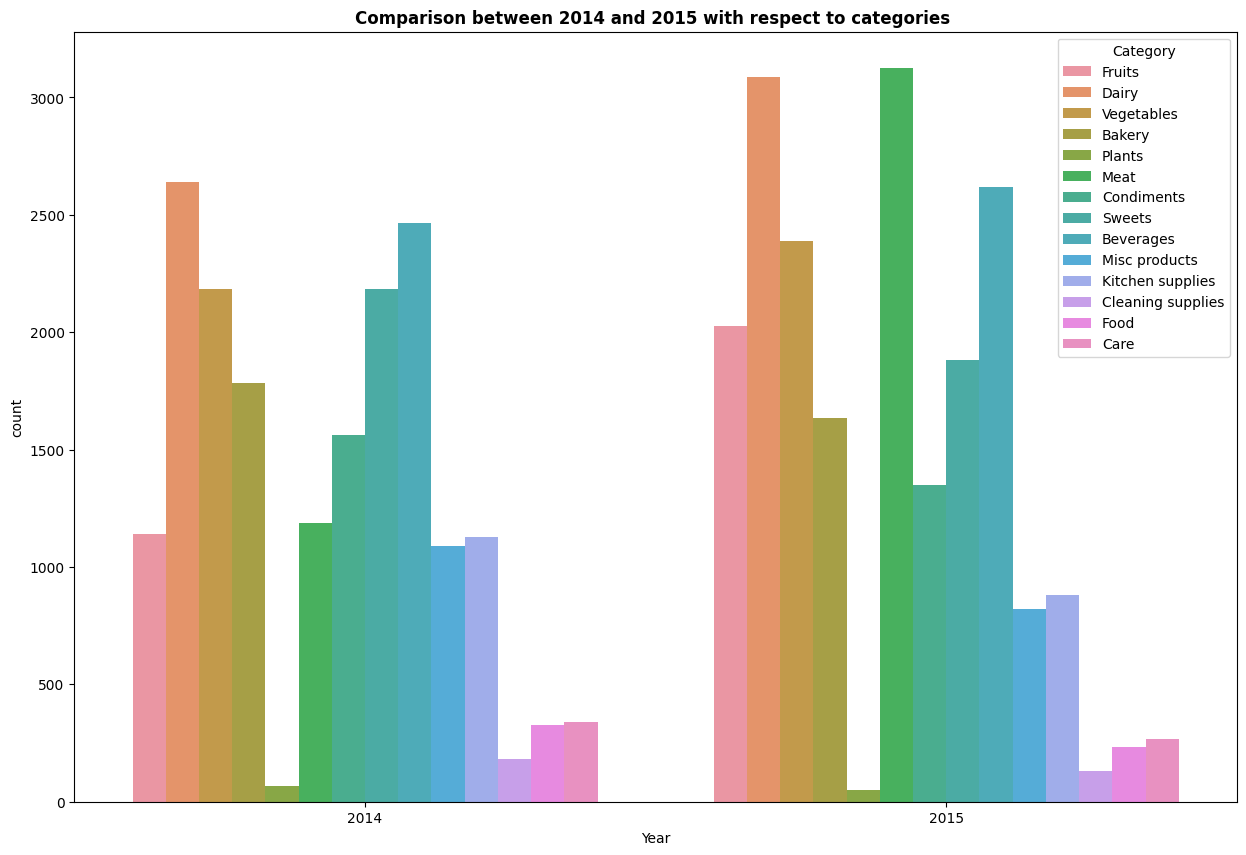

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'Year', hue ='Category', data = df)
#sns.countplot(df['Year'], hue = df['Category'])
#df['Year'].value_counts()
plt.title("Comparison between 2014 and 2015 with respect to categories ", fontweight = 'bold', fontsize = 12)

Inferences :
- The yearly demand for each category is illustrated in the figure above , with the graphs indicating that meat has the highest demand in both the years while, and dairy has the second highest demand in 2015 and Beverages in 2014.

#### 2)Frequency of the categories in terms of items sold



In [ ]:
Frequency_ofitems = df.groupby(pd.Grouper(key = 'Category')).size().reset_index(name = 'count')
fig = px.treemap(Frequency_ofitems, path = ['Category'], values = 'count')
fig.update_layout(
    title_text = 'Frequency of the Categories(Items) Sold',
    title_x = 0.5, title_font = dict(size = 15),
    height = 1000
)
fig.update_traces(textinfo = "label+value")
fig.show()

Inferences :
- The graph above shows that the "Dairy" category has the highest frequency of items sold, followed by "Vegetables." 
- In contrast, the categories of "Cleaning Supplies" and "Plants" are in the region with the least frequencies.

3) Variation in demand of different categories over months


In [ ]:
df['Month'] = df['Date'].dt.month
df

,Member_number,Date,itemDescription,Category,Year,Month
0,1808,2015-07-21,tropical fruit,Fruits,2015,7
1,2552,2015-05-01,whole milk,Dairy,2015,5
2,2300,2015-09-19,pip fruit,Fruits,2015,9
3,1187,2015-12-12,other vegetables,Vegetables,2015,12
4,3037,2015-01-02,whole milk,Dairy,2015,1
...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,Dairy,2014,8
38761,2022,2014-02-23,candy,Sweets,2014,2
38762,1097,2014-04-16,cake bar,Sweets,2014,4
38763,1510,2014-03-12,fruit/vegetable juice,Vegetables,2014,3


In [ ]:
df_temp = pd.DataFrame(df.groupby(['Month','Category'])['Category'].count())


In [ ]:
df_temp.rename(columns = {'Category': 'count'},inplace = True)
df_temp.reset_index(drop = False,inplace = True)

df_temp.sort_values(by = 'count', ascending = False)[:20]


,Month,Category,count
103,8,Dairy,519
47,4,Dairy,518
33,3,Dairy,511
89,7,Dairy,502
145,11,Dairy,499
5,1,Dairy,491
61,5,Dairy,483
71,6,Beverages,470
131,10,Dairy,466
57,5,Beverages,459


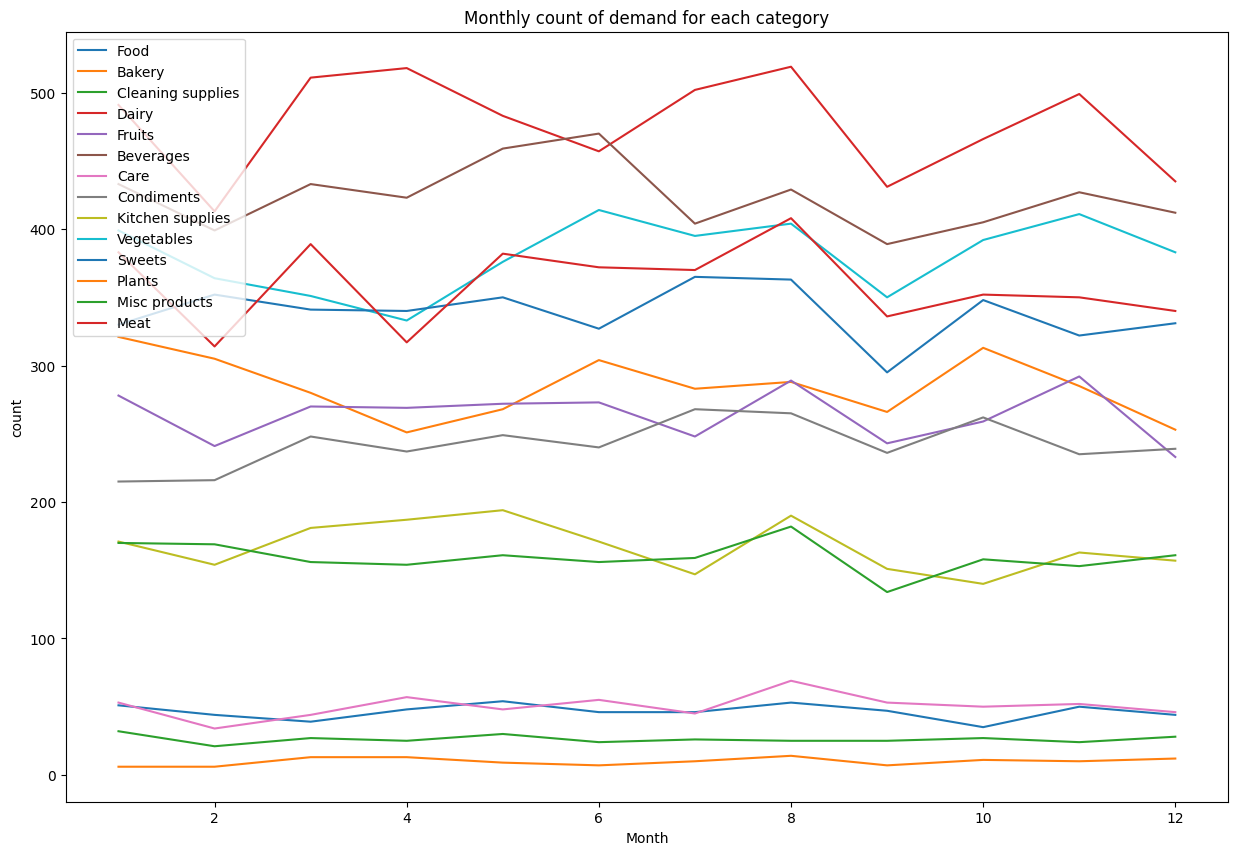

In [ ]:
categories = set(df_temp['Category'])

plt.figure(figsize=(15,10))
for category in categories:
     selected_data = df_temp.loc[df_temp['Category'] == category]
     plt.plot(selected_data['Month'], selected_data['count'], label = category)
plt.xlabel('Month')
plt.ylabel('count')
plt.legend()
plt.title('Monthly count of demand for each category')
plt.show()

Inferences : 
- The above graph focuses on analyzing monthly trends in demand for each country. 
- Observations suggest a significant variation in the range of counts for each category. 


4) Variation in demand of different categories over Week


In [ ]:
df['Week'] = df['Date'].dt.week
df

,Member_number,Date,itemDescription,Category,Year,Month,Week
0,1808,2015-07-21,tropical fruit,Fruits,2015,7,30
1,2552,2015-05-01,whole milk,Dairy,2015,5,18
2,2300,2015-09-19,pip fruit,Fruits,2015,9,38
3,1187,2015-12-12,other vegetables,Vegetables,2015,12,50
4,3037,2015-01-02,whole milk,Dairy,2015,1,1
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,Dairy,2014,8,32
38761,2022,2014-02-23,candy,Sweets,2014,2,8
38762,1097,2014-04-16,cake bar,Sweets,2014,4,16
38763,1510,2014-03-12,fruit/vegetable juice,Vegetables,2014,3,11


In [ ]:
df_temp_2014 = df.loc[df['Year'] == 2014]
df_temp_2014 = pd.DataFrame(df_temp_2014.groupby(['Week','Category'])['Category'].count())
df_temp_2014.rename(columns = {'Category': 'count'},inplace = True)
df_temp_2014.reset_index(drop = False,inplace = True)
df_temp_2014

,Week,Category,count
0,1,Bakery,38
1,1,Beverages,53
2,1,Care,3
3,1,Cleaning supplies,3
4,1,Condiments,27
...,...,...,...
709,52,Kitchen supplies,27
710,52,Meat,24
711,52,Misc products,19
712,52,Sweets,43


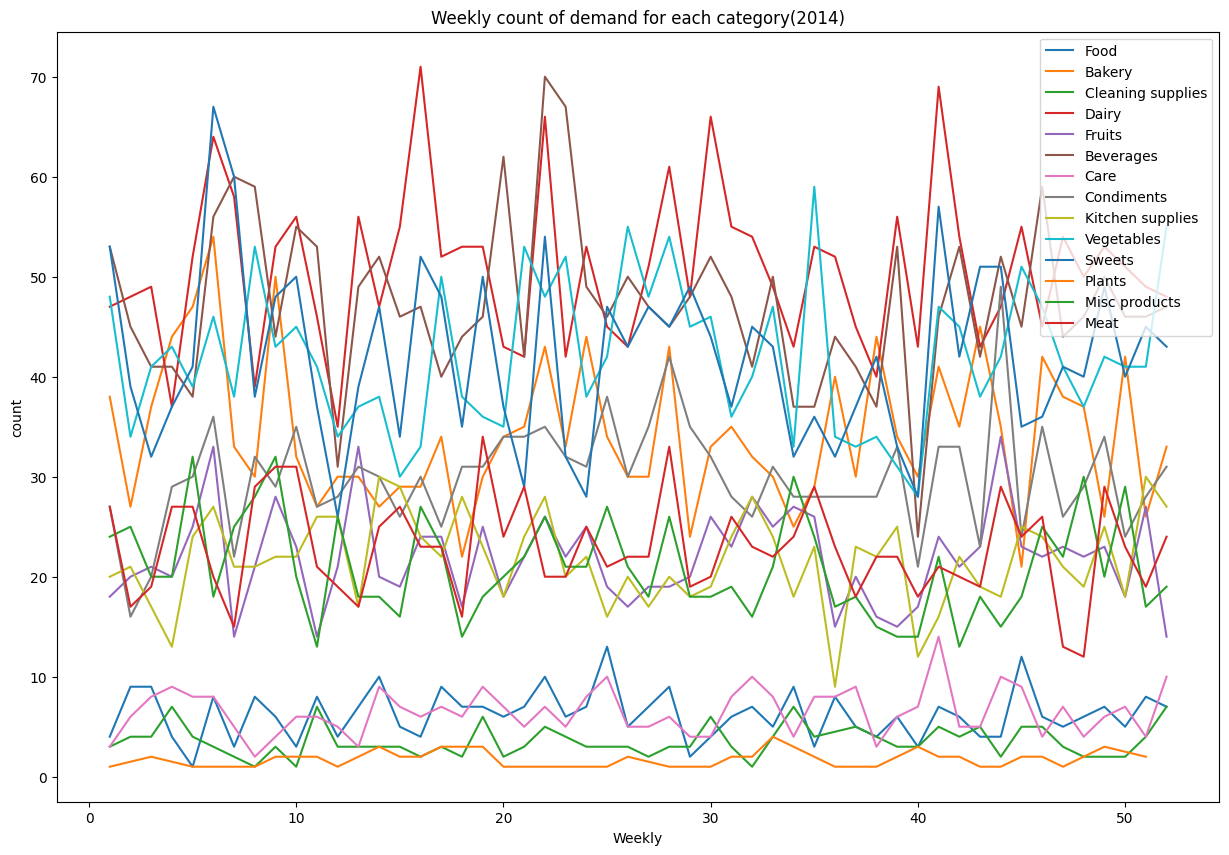

In [ ]:
categories = set(df_temp_2014['Category'])

plt.figure(figsize=(15,10))
for category in categories:
     selected_data = df_temp_2014.loc[df_temp_2014['Category'] == category]
     plt.plot(selected_data['Week'], selected_data['count'], label = category)
plt.xlabel('Weekly')
plt.ylabel('count')
plt.legend()
plt.title('Weekly count of demand for each category(2014)')
plt.show()

In [ ]:
df_temp_2015 = df.loc[df['Year'] == 2015]
df_temp_2015 = pd.DataFrame(df_temp_2015.groupby(['Week','Category'])['Category'].count())
df_temp_2015.rename(columns = {'Category': 'count'},inplace = True)
df_temp_2015.reset_index(drop = False,inplace = True)

df_temp_2015

,Week,Category,count
0,1,Bakery,17
1,1,Beverages,33
2,1,Care,4
3,1,Cleaning supplies,2
4,1,Condiments,15
...,...,...,...
713,53,Kitchen supplies,8
714,53,Meat,25
715,53,Misc products,4
716,53,Sweets,18


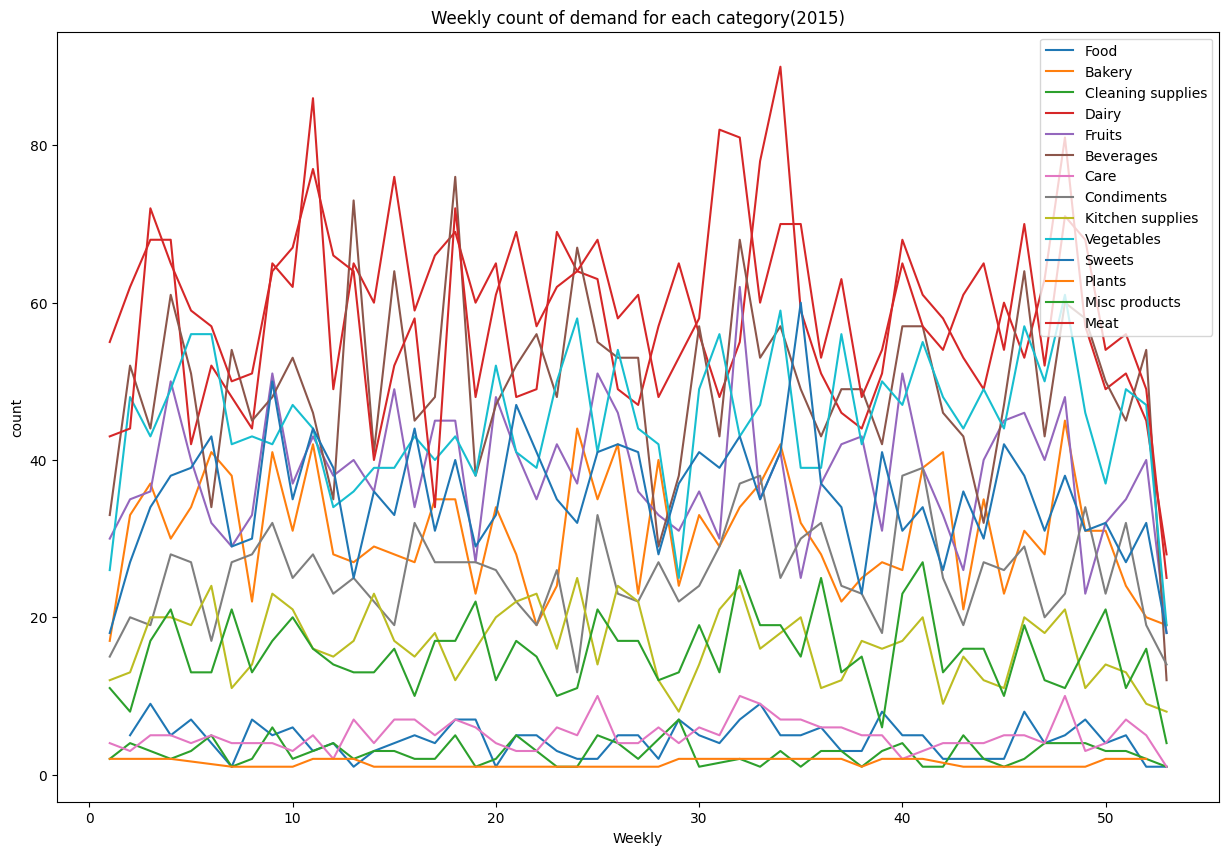

In [ ]:
categories = set(df_temp_2015['Category'])

plt.figure(figsize=(15,10))
for category in categories:
     selected_data = df_temp_2015.loc[df_temp_2015['Category'] == category]
     plt.plot(selected_data['Week'], selected_data['count'], label = category)
plt.xlabel('Weekly')
plt.ylabel('count')
plt.legend()
plt.title('Weekly count of demand for each category(2015)')
plt.show()

Inferences:
- The above figures shows a more in-depth analysis of the demand for each category, plotted over two years. 
- The first Figure illustrates the demands for the year 2014, while the second represents the demands for the year 2015. 
- It can be observed that some categories overlap, and we observe similar demand trends for these categories.

4) Variation in demand of different categories on daily basis

In [ ]:
df.set_index('Date',inplace=True)

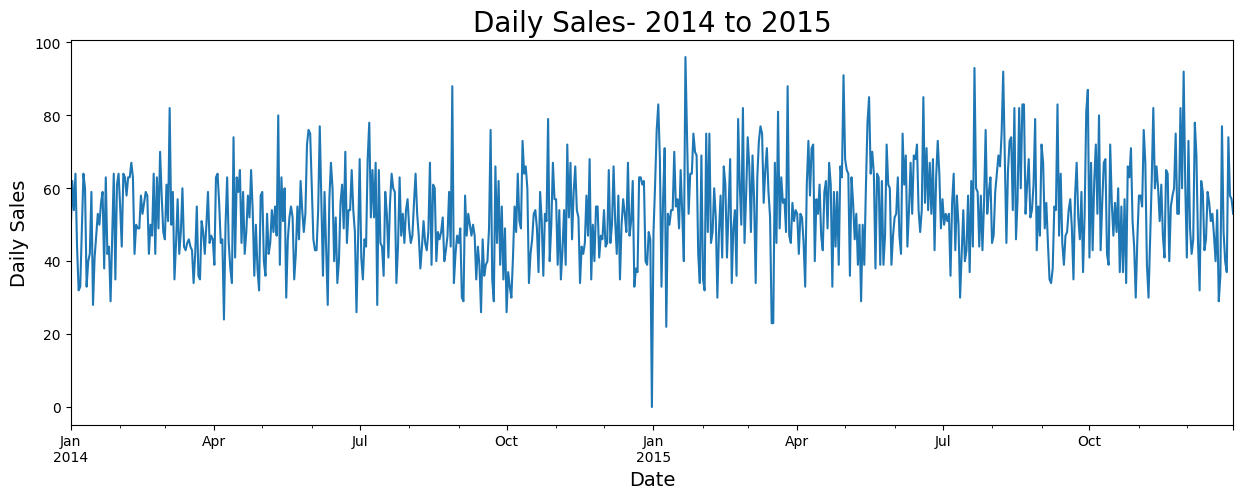

In [ ]:
df.resample('D')[['itemDescription']].count().plot(kind='line',figsize=(15,5),legend=None)
plt.title('Daily Sales- 2014 to 2015',fontsize=20)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Daily Sales',fontsize=14)
plt.show()

Inferences:
- The graph above indicates a consistent pattern in daily sales from 2014 to 2015, with the exception of a dip in January 2015. 
- The cause of this dip is uncertain and may be attributed to various factors such as inflation, among others.

Results Part 1 :
- In all the above graphs and eda, where we are trying to look into variation in demand of different categories over months, weeks and on day to daily basis. 
- It can observed that there are few factors and categories which have a significant amount of dominance on the whole patterns and trends


### **Midterm Project Part II** :
1. Are there seasonal or trend-based patterns in customers' purchasing behavior 
that can be identified and accounted for in a forecasting model?
2. What is the most appropriate forecasting method for this type of data (e.g. time series analysis, regression analysis, machine learning algorithms), and how can its accuracy be evaluated?
3. How can data preprocessing techniques such as feature scaling, outlier detection, or missing value imputation improve the accuracy of a forecasting model?



We will be focusing on the top 3 categories which have maximum demand that were analyzed in the previous section. These are:
1. Beverages
2. Dairy
3. Vegetables

### **Time Series Analysis**

- To indentify the seasonal or trend based patterns in customer's purchasing behaviour, our first step consists of working on the raw data , which includes loading in the original groceries data in the pandas dataframe and resampling the monthly frequency.



In [ ]:
#Importing the libraries
import statsmodels.api as sm

#Loading the original data 
try_df = pd.read_csv('/content/drive/MyDrive/Usable AI/Groceries Dataset/Groceries_dataset.csv', index_col='Date', parse_dates=True)

In [ ]:
#Checking for null values
try_df.isnull().sum()

Member_number      0
itemDescription    0
dtype: int64

- Next, we include plotting the monthly sales data and decompose the time series into its trend, seasonal and residual components.


In [ ]:
#Resampling the data to monthly data
monthly_data = try_df.resample('M').sum()

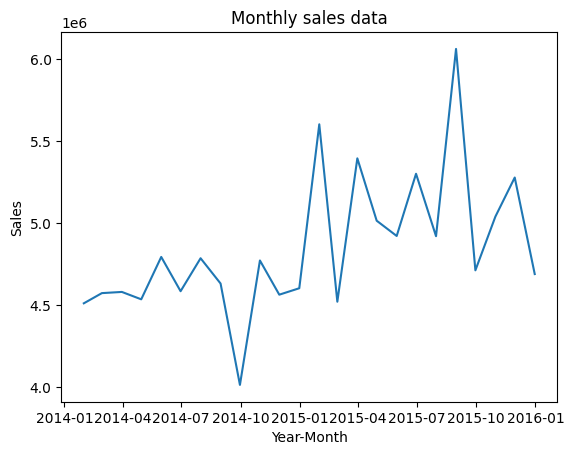

In [ ]:
#Plotting the monthly groceries data
fig, ax =plt.subplots()
ax.plot(monthly_data)
ax.set(title = 'Monthly sales data', xlabel = 'Year-Month', ylabel = 'Sales')
plt.show()

#Decomposing the time series into components
decomp = sm.tsa.seasonal_decompose(monthly_data, model ='multiplicative')

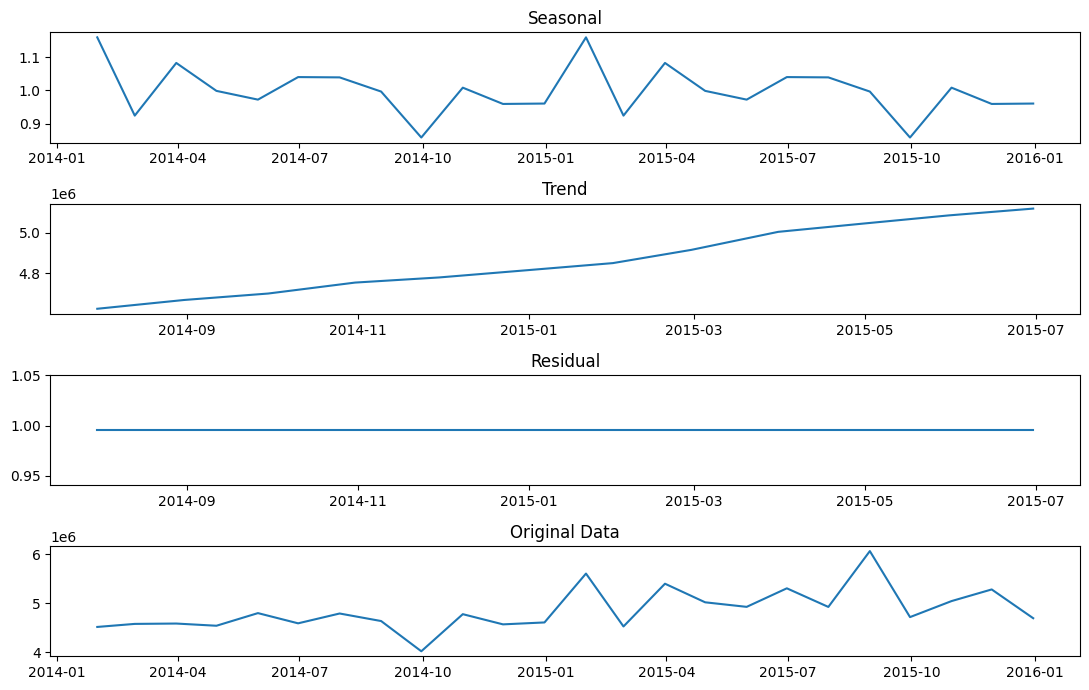

In [ ]:
#Plotting the seasonal, trend and residual components

plt.figure(figsize = (11,7))
plt.subplot(4,1,1)
plt.plot(decomp.seasonal)
plt.title('Seasonal')
plt.subplot(4,1,2)
plt.plot(decomp.trend)
plt.title('Trend')
plt.subplot(4,1,3)
plt.plot(decomp.resid)
plt.title('Residual')
plt.subplot(4,1,4)
plt.plot(monthly_data)
plt.title('Original Data')
plt.tight_layout()
plt.show()



The decomposition functionality gives us 3 of the following elements:
1. trend — the general direction of the series over 24 months(2 years) for all the data items present
2. seasonality — a distinct, repeating pattern observed in regular intervals due to various seasonal factors, which was monthly in our case
3. residual — the irregular component consisting of the fluctuations in the time series after removing the previous components


- Further, we use a SARIMA model to future sales amd plot the original and forecasted groceries data.

In [ ]:
#Forecasting future sales using SARIMA model
sa_model = sm.tsa.statespace.SARIMAX(monthly_data,order= (1,1,1), seasonal_order =(1 ,1 ,1 ,12))
results = sa_model.fit()
future_sales = results.predict(start = len(monthly_data), end=len(monthly_data)+11, dynamic = True)


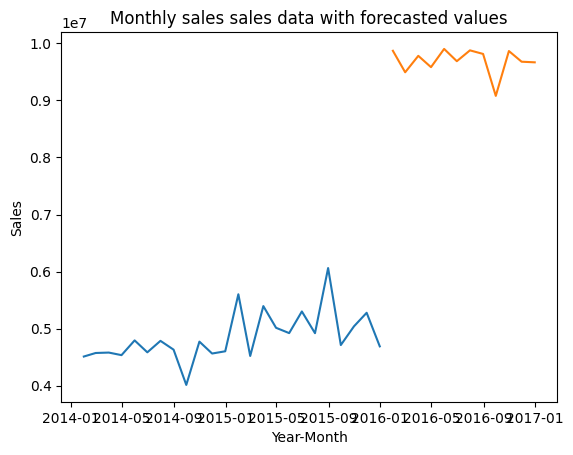

In [ ]:
#Plotting the original and forecasted data
plt.plot(monthly_data)
plt.plot(future_sales)
plt.title("Monthly sales sales data with forecasted values")
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.show()

Insights:  
- Yes, it can be observed from the above graphs that there are seasonal trends and trend based patterns in customer's behaviour towards purchasing which can be accounted and identified for in the forecasting model.  


## Drilling deeper down into categories(Top 3) of itmes and their trend analyses

Analysing trend for "Beverages" category

In [ ]:
# Load sales data into a pandas DataFrame
try_df

# Resample the data to monthly frequency
monthly_sales_data = try_df.resample('M').sum()

# Split the data into training and testing sets
train_data = monthly_sales_data.iloc[:-12]
test_data = monthly_sales_data.iloc[-12:]

# Fit an ARIMA model to the training data
model = sm.tsa.statespace.SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

In [ ]:
df_top = pd.DataFrame(df.groupby(['Month','Category','Year'])['Category'].count())
df_top.rename(columns = {'Category': 'count'},inplace = True)
df_top.reset_index(drop = False,inplace = True)
df_top


,Month,Category,Year,count
0,1,Bakery,2014,173
1,1,Bakery,2015,148
2,1,Beverages,2014,197
3,1,Beverages,2015,236
4,1,Care,2014,32
...,...,...,...,...
331,12,Plants,2015,6
332,12,Sweets,2014,195
333,12,Sweets,2015,136
334,12,Vegetables,2014,192


<Axes: xlabel='Month'>

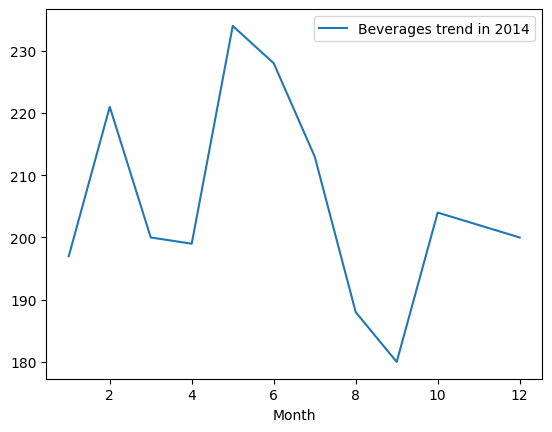

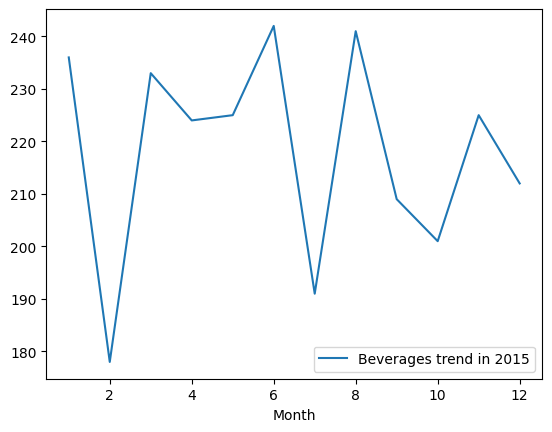

In [ ]:
df_bev = df_top.loc[df_top['Category'] == 'Beverages']
df_bev.head()

#Creating dataframes and plotting demand graph for beverages in the years 2014 and 2015
data_sel_2014 = df_bev.loc[df_bev['Year'] == 2014]
data_sel_2014.plot(x = 'Month',y = 'count',label = 'Beverages trend in 2014')


data_sel_2015 = df_bev.loc[df_bev['Year'] == 2015]
data_sel_2015.plot(x = 'Month',y = 'count',label = 'Beverages trend in 2015')

Insight: The two graphs above represent the demand of beverages over the years 2014 and 2015. This gave us a general idea of how the demand might be dipping around the months 3-5 and aorun 9-10.

In [ ]:
#Collecting data for only 'Beverages' category
df_sel = df.reset_index()[['Date','Category']].copy()
date_bev = df_sel.loc[df_sel['Category'] == 'Beverages']
date_bev.set_index("Date",inplace = True)
date_bev['count'] = 1


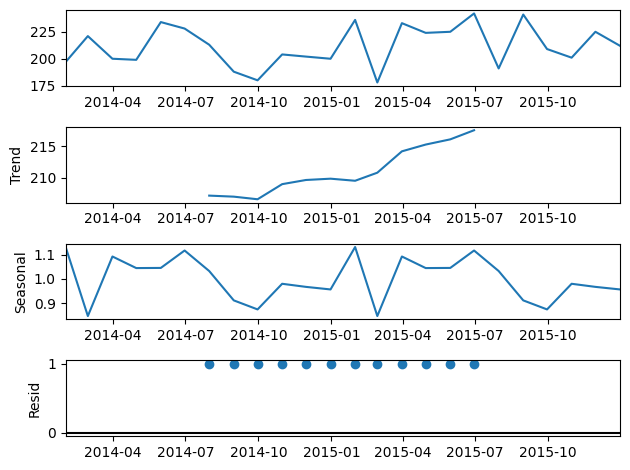

In [ ]:
#Seasonal decomposition for trend analysis of Beverages
date_bev_monthly_data = date_bev.resample('M').sum()
date_bev_monthly_data.head()


#Multiplicative model
decompose_result_mult = sm.tsa.seasonal_decompose(date_bev_monthly_data,model = 'multiplicative')
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

Insight: The idea of trends that we observed by plotting the monthly demand was generalised in the decomposition graph above. The seasonal pattern might not be the most reliable one,since we have historical data for only past 2 years.

**Analysing demands for "Dairy" category**


<Axes: xlabel='Month'>

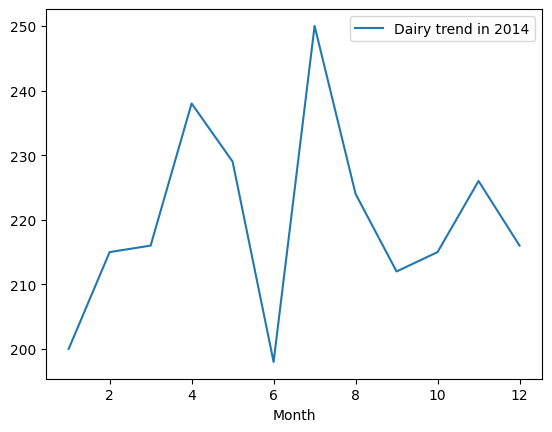

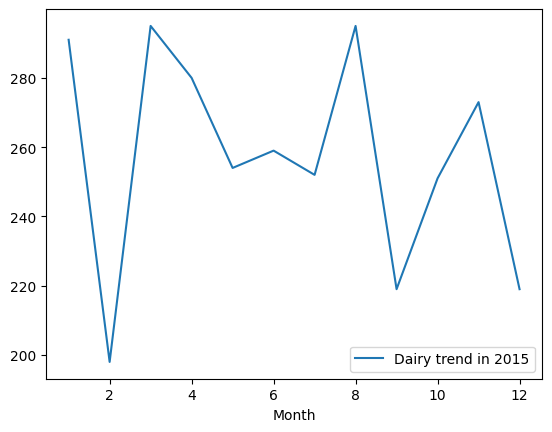

In [ ]:
df_dairy = df_top.loc[df_top['Category'] == 'Dairy']
df_dairy.head()

#Creating dataframes and plotting demand graph for beverages in the years 2014 and 2015
data_sel_2014 = df_dairy.loc[df_dairy['Year'] == 2014]
data_sel_2014.plot(x = 'Month',y = 'count',label = 'Dairy trend in 2014')


data_sel_2015 = df_dairy.loc[df_dairy['Year'] == 2015]
data_sel_2015.plot(x = 'Month',y = 'count',label = 'Dairy trend in 2015')

Insight: Similar to the beverages category,we tried to understand the general trend of demand for the Dairy category. The data for 2 years is quite varied to be generalised.

In [ ]:
#Collecting the data for 'Dairy' category
date_dairy = df_sel.loc[df_sel['Category'] == 'Dairy']
date_dairy.set_index("Date",inplace = True)
date_dairy['count'] = 1


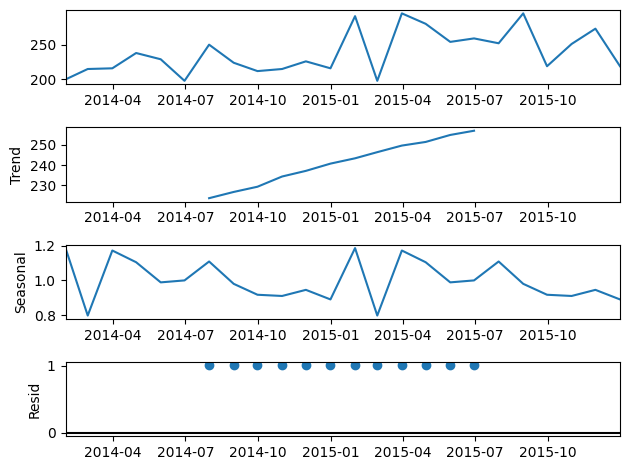

In [ ]:
#Seasonal decomposition for trend analysis of Beverages
date_dairy_monthly_data = date_dairy.resample('M').sum()
date_dairy_monthly_data.head()


#Multiplicative model
decompose_result_mult = sm.tsa.seasonal_decompose(date_dairy_monthly_data,model = 'multiplicative')
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

Insight: The general trend captured during decomposition of demand for Dairy category seems to be positively increasing. The seasonal pattern shows a dip around the month of March.

**Analysing trends for "Vegetables" category**

<Axes: xlabel='Month'>

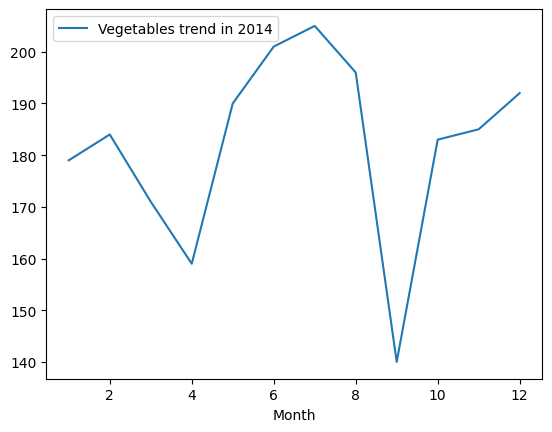

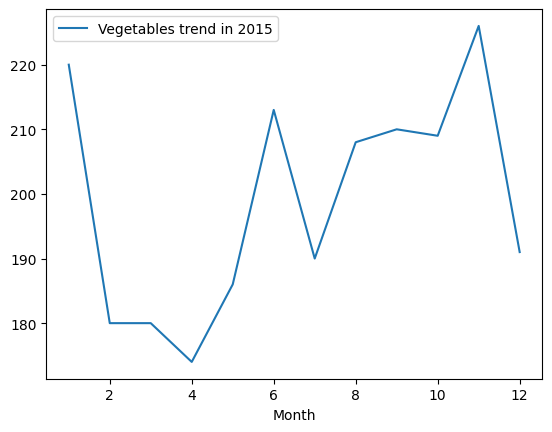

In [ ]:
df_veg = df_top.loc[df_top['Category'] == 'Vegetables']
df_veg.head()

#Creating dataframes and plotting demand graph for beverages in the years 2014 and 2015
data_sel_2014 = df_veg.loc[df_veg['Year'] == 2014]
data_sel_2014.plot(x = 'Month',y = 'count',label = 'Vegetables trend in 2014')


data_sel_2015 = df_veg.loc[df_veg['Year'] == 2015]
data_sel_2015.plot(x = 'Month',y = 'count',label = 'Vegetables trend in 2015')

Insight: Similar to the previous categories,we tried to understand the general trend of demand for the Vegetables category

In [ ]:
date_veg = df_sel.loc[df_sel['Category'] == 'Vegetables']
date_veg.set_index("Date",inplace = True)
date_veg['count'] = 1


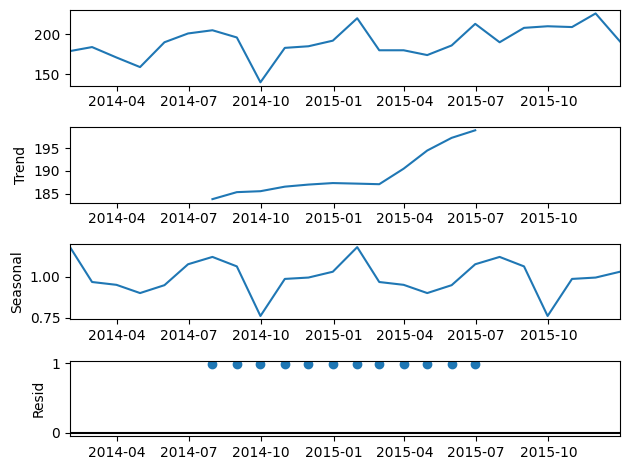

In [ ]:
#Seasonal decomposition for trend analysis of Beverages
date_veg_monthly_data = date_veg.resample('M').sum()
date_veg_monthly_data.head()


#Multiplicative model
decompose_result_mult = sm.tsa.seasonal_decompose(date_veg_monthly_data,model = 'multiplicative')
trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

Insight: The generalised trend for 'Vegetables' category seem to be increasing slowly and then exponentially after around March. The seasonal graph clearly shows a dip around the month of October, and high demand in the beginning of the year.

Result Part II : 
- Firstly, we have identified seasonal and trend-based patterns in customers' purchase behavior, which we observed across three categories. 
- Given the large amount of data and the potential for unreliable data, we plan to develop a forecasting model that takes into account the observed trend patterns for the top three categories.

### Following are the research and design questions which are the further steps and will be the focus on the next part of the study :

1. What are the trade-offs between a simpler, more interpretable forecasting model and a more complex, potentially more accurate model, and how can these trade-offs be optimized for the specific business problem at hand?
2. Can clustering or segmentation techniques be used to group customers based on similar purchasing behavior and improve the accuracy of the forecasting model for each group?
3. How can the forecasting model be integrated with other business processes such as inventory management, supply chain planning, or marketing campaigns to optimize business performance?
